In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

In [392]:
def imshow(title, image) :
    plt.figure(figsize=(15,15))
    plt.title(title)    
    plt.xticks([])
    plt.yticks([])
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [23]:
img = cv2.imread('lenna.bmp', 0)


In [24]:
# 각 픽셀에 직접 접근하여 픽셀값 수정
# 속도 느림
dest = img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        col = img[r, c] + 30
        if(col > 255):
            col = 255
        dest[r,c] = col

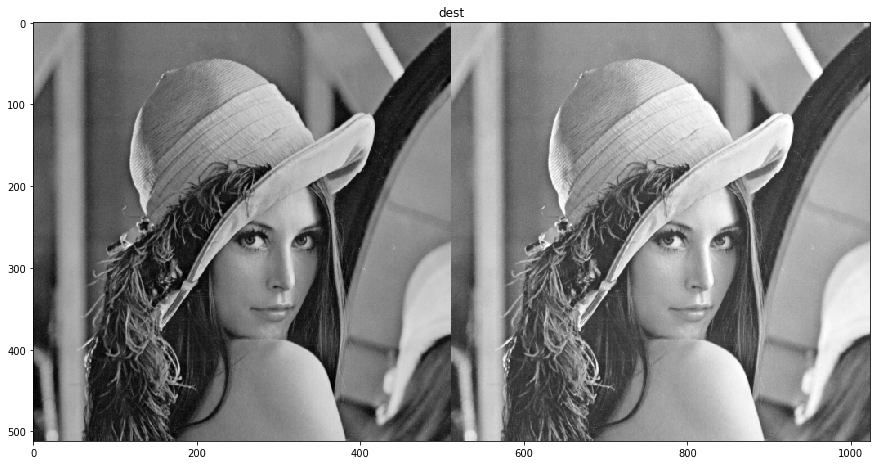

In [25]:
imshow('dest', np.hstack((img, dest)))

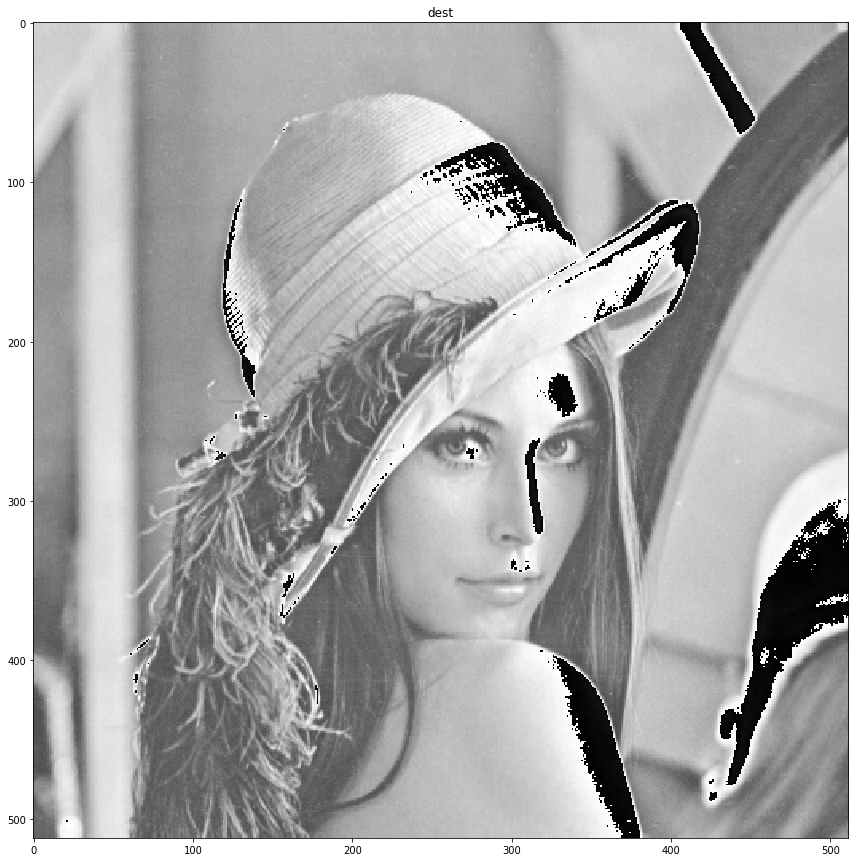

In [27]:
# numpy 연산
# 빠른 속도 but overflow 막지못함
dest = img + 50
imshow('dest', dest)

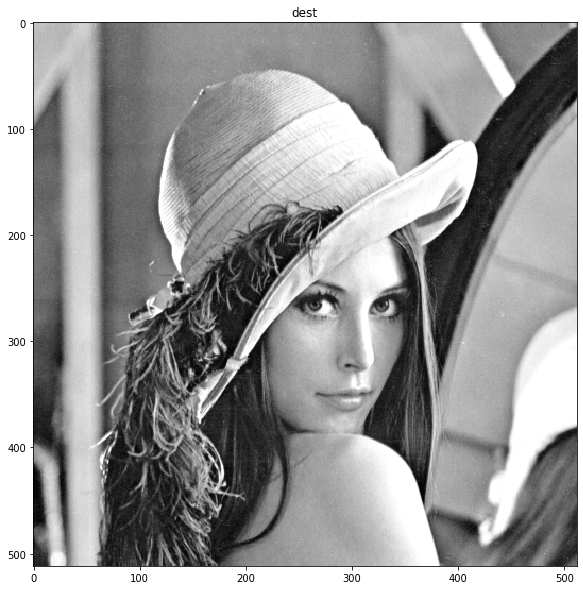

In [37]:
# side effect도 없고 연산도 빠른 메소드
# cv2.add()
dest = cv2.add(img, 50)
imshow('dest', dest)

In [52]:
a = np.array([
    [1,5,],
    [10,20,],
]).astype('uint8')
b = cv2.add(a, 240)
print(a)
print(b)

[[ 1  5]
 [10 20]]
[[241 245]
 [250 255]]


In [63]:
print(a[1,1] + 250) # 단일값과 단일값 사이의 연산은 큰 범위의 타입으로 자동캐스팅 되어 연산된다.
b = a + 250         # 자동형변환 되고 b가 uint8타입이 된다.
c = a + 250.0       # 자동형변환 되고 c가 float타입이 된다.
d = a + 300         # 자동형변환 되고 d가 uint16타입이 된다.
print(b, b.dtype) 
print(c, c.dtype)
print(d, d.dtype)

270
[[251 255]
 [  4  14]] uint8
[[251. 255.]
 [260. 270.]] float64
[[301 305]
 [310 320]] uint16


In [71]:
dd = np.clip(a + 240.0, 0, 255)
dd = dd.astype('uint8')
print(dd)
print(dd.dtype)

[[241 245]
 [250 255]]
uint8


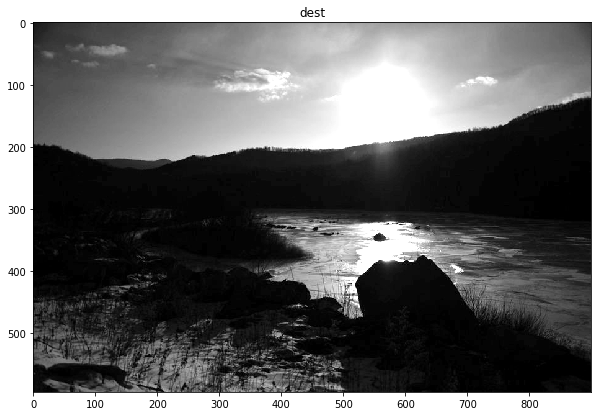

In [90]:
img = cv2.imread('gamma1.jpg', 0)
dest = np.clip(img + 100.0, 0, 255).astype('uint8')
imshow('dest', dest)

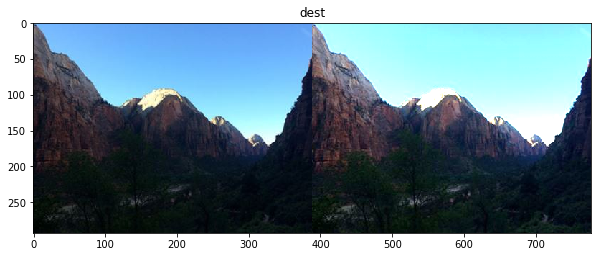

In [97]:
img = cv2.imread('gamma3.jpg')

alpha = 1.5 # 이미지의 밝기를 조정 (%)
beta = 0
dest = np.clip((alpha * img) + beta, 0, 255).astype('uint8')

imshow('dest', np.hstack((img, dest)))

# Look Up Table

## Point 연산
- y = alpha * img + beta
- clipping

In [104]:
# 이미지 반전 LUT
table = np.array([255-i for i in range(256)])
print(table)

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

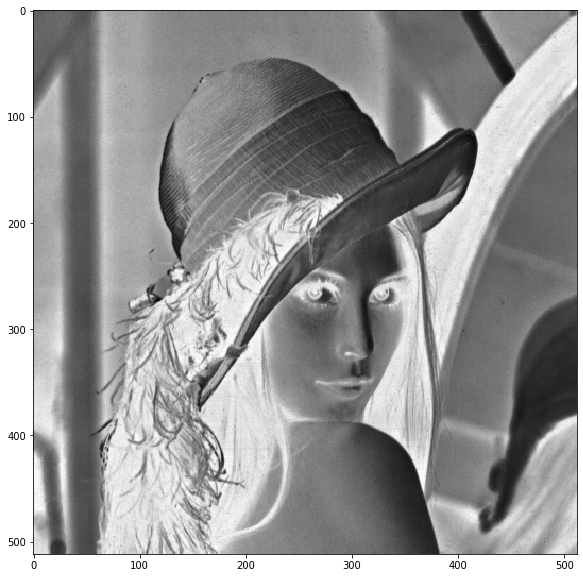

In [99]:
img1 = cv2.imread('lenna.bmp', 0)
out = cv2.LUT(img1, table)
imshow('', out)

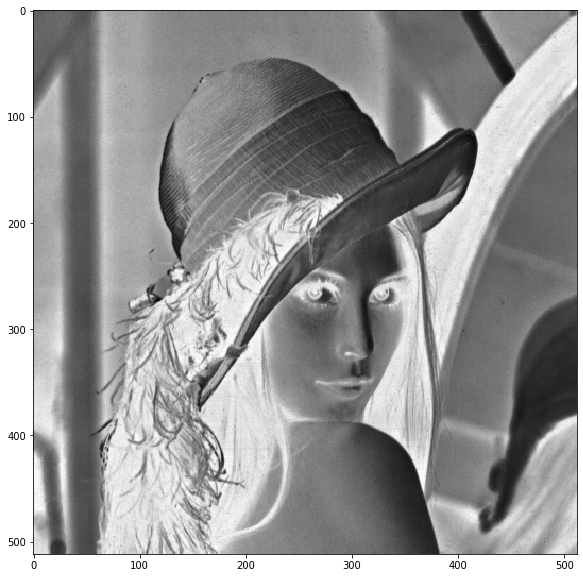

In [105]:
# 이미지 반전 LUT 내부 동작코드
dest = img1.copy()
for r in range(img1.shape[0]):
    for c in range(img1.shape[1]):
        dest[r,c] = table[img1[r,c]] # 0 -> 255, 1 -> 254, ... 255 -> 0
         
imshow('', dest)

threshold LUT
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255

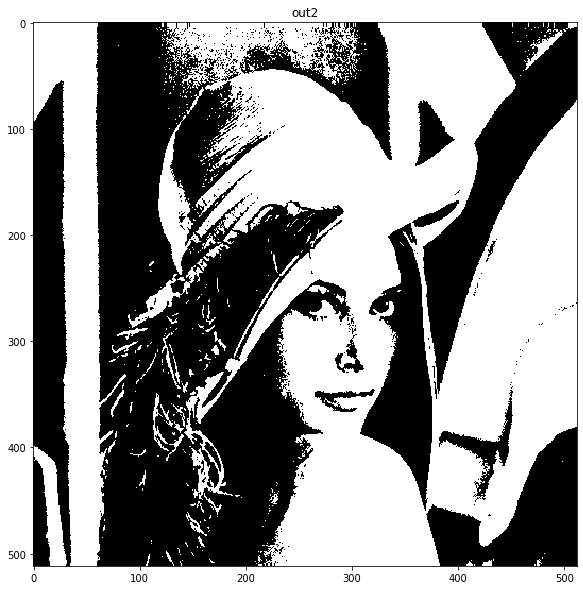

In [121]:
# threshold LUT , th = 127
t_table = np.array([255 if i > 127 else 0 for i in range(256)])
print('threshold LUT\n', t_table)
dest2 = img1.copy()
out2 = cv2.LUT(dest2, t_table)
imshow('out2', out2)

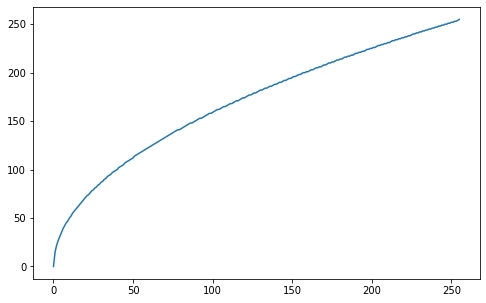

In [162]:
# gamma, exponenetial로 밝아지고 어두워진다
# gamma < 1  --> 이미지가 밝아짐
# gamma == 1 --> 원본이미지
# gamma > 1  --> 이미지가 어두워짐

gamma = 0.5
gamma_table = np.array([((i / 255.0) ** gamma) * 255.0 for i in np.arange(0, 256)]).astype('uint8')
plt.figure(figsize=(8,5))
plt.plot(g_table)

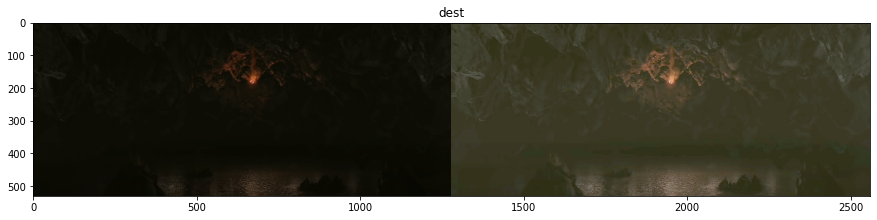

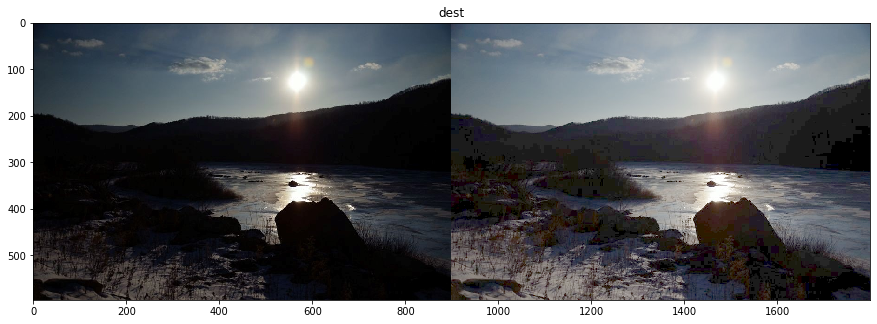

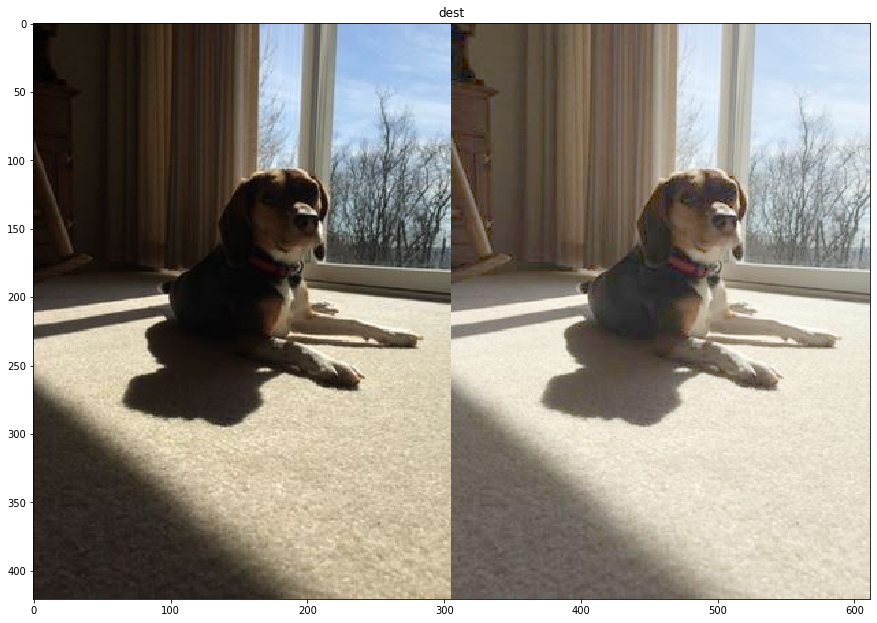

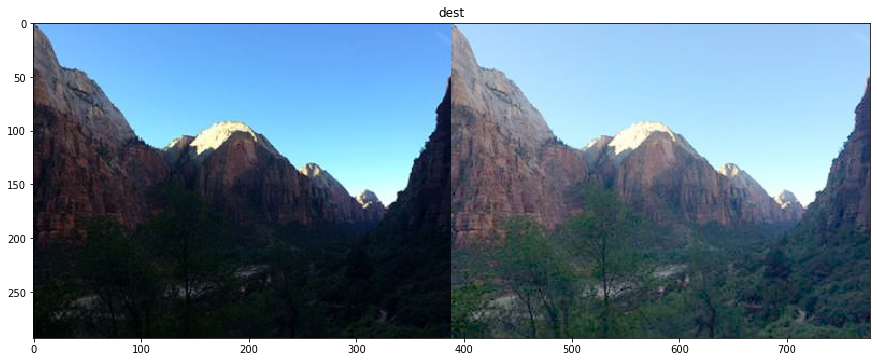

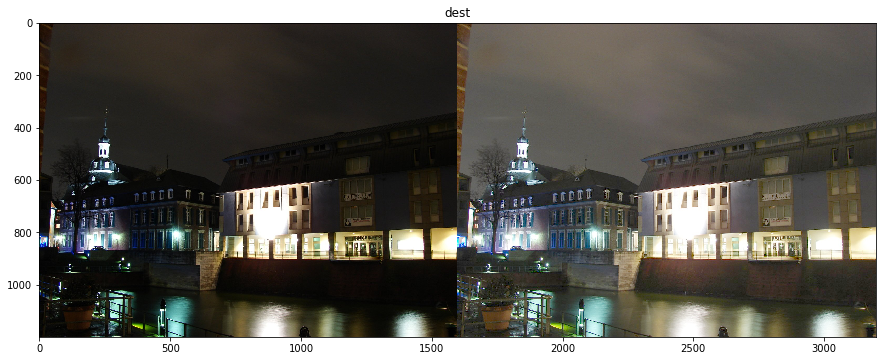

In [173]:
files = ['./img/sample_barlog.png', './img/gamma1.jpg', './img/gamma2.jpg', './img/gamma3.jpg', './img/sample_night2.jpg']
for f in files:
    img1 = cv2.imread(f)
    out = cv2.LUT(img1, gamma_table)
    imshow('dest', np.hstack((img1, out)))

# Image synthesis
- np.array + np.array
- g(x,y) = a * f1(x, y) + (1 - a) * f2(x, y) --> overflow를 방지
- 0 <= a <= 1

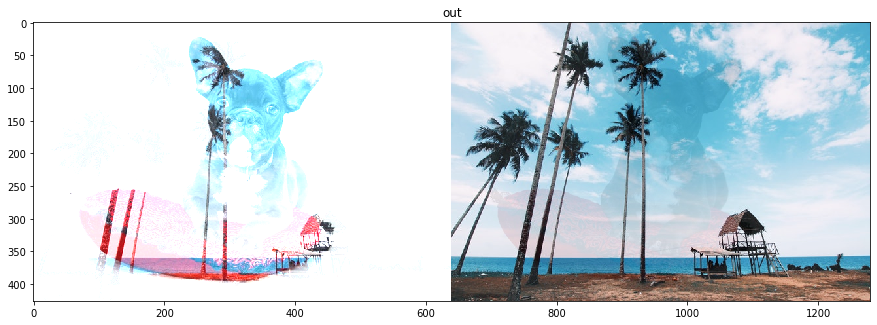

In [184]:
img1 = cv2.imread('./img/test1.jpg')
img2 = cv2.imread('./img/test2.jpg')

alpha = 0.9
out_add = cv2.add(img1, img2)
out_weighted = cv2.addWeighted(img1, alpha, img2, 1-alpha, 0.0)
imshow('out', np.hstack((out_add, out_weighted)))

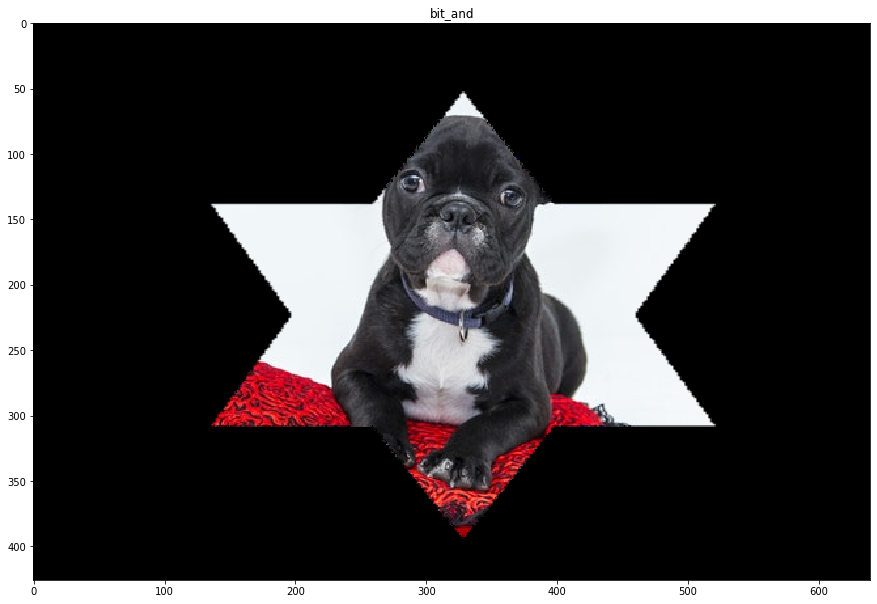

In [191]:
img1 = cv2.imread('./img/test2.jpg')
img2 = cv2.imread('./img/star.png')
img2 = cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0]))

bit_and = cv2.bitwise_and(img1, img2)
imshow("bit_and", bit_and)

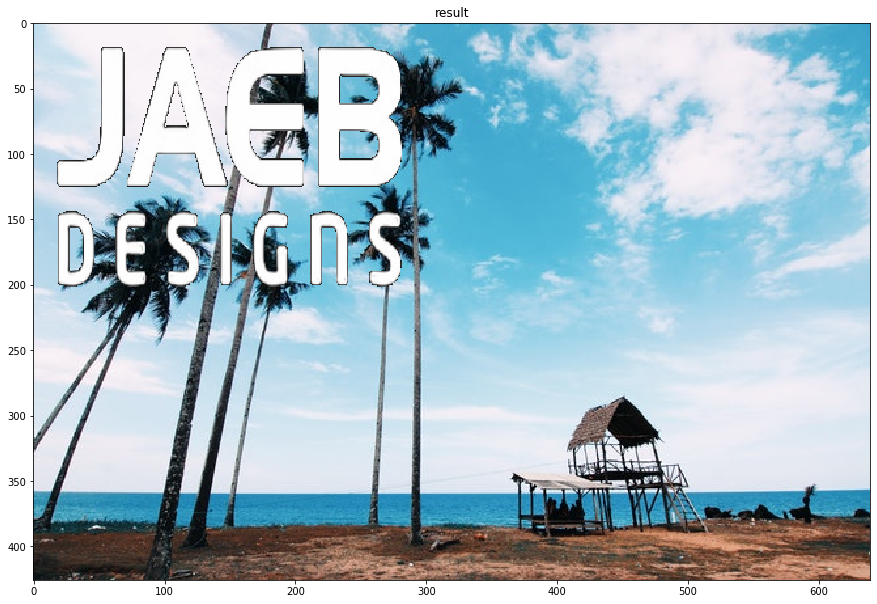

In [257]:
img1 = cv2.imread("./img/test1.jpg")
logo = cv2.imread("./img/logo_back.jpg")
logo = cv2.resize(logo, dsize=(int(img1.shape[1] / 2), int(img1.shape[0] / 2)))

for r in range(logo.shape[0]):
    for c in range(logo.shape[1]):
        if np.mean(logo[r,c,:]) > 20:
            img1[r, c, :] = logo[r, c, :]
        
imshow('result', img1)

(150, 328, 3)
(150, 328, 3)


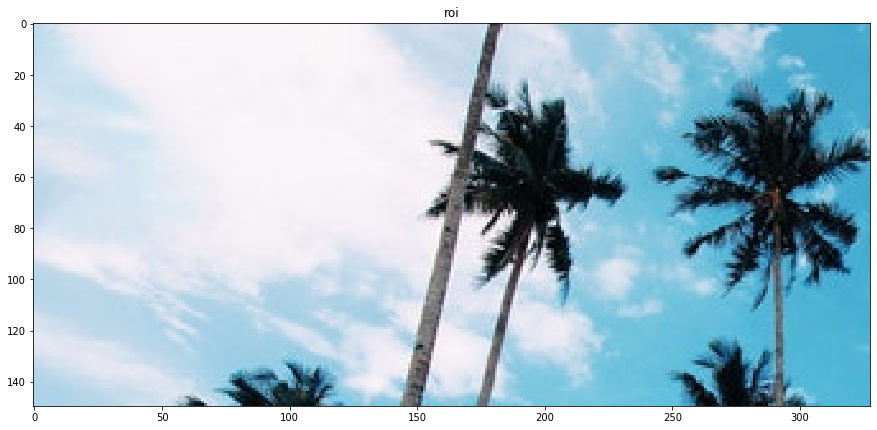

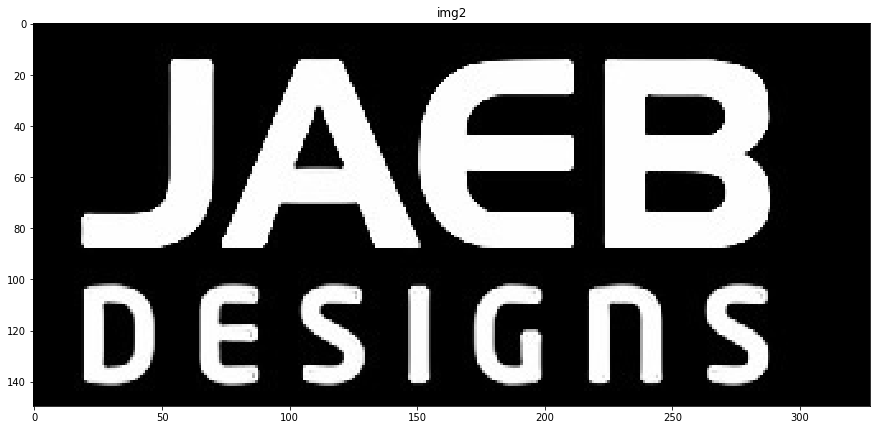

In [297]:
img1 = cv2.imread('./img/test1.jpg')
img2 = cv2.imread('./img/logo_back.jpg')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print(roi.shape)
print(img2.shape)
imshow("roi", roi)
imshow("img2", img2)

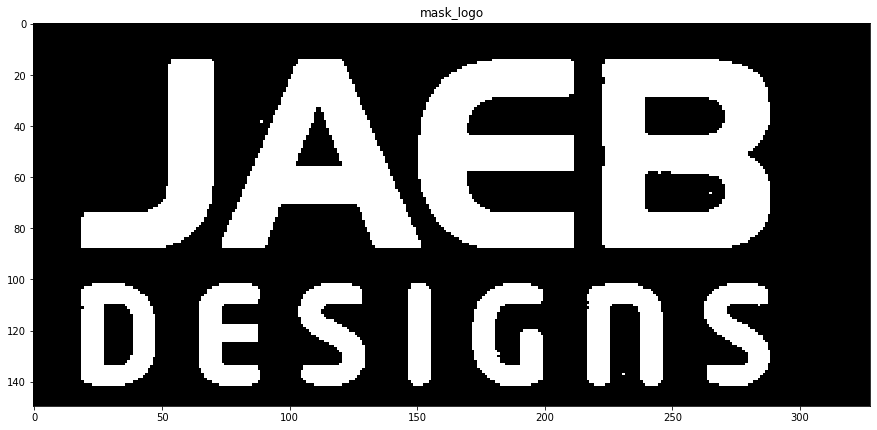

In [298]:
# masking
# logo foreground 추출하기 위한 마스크 --> 픽셀값이 255인 로고부분만 배경위에 합성됨
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
imshow('mask_logo', mask)

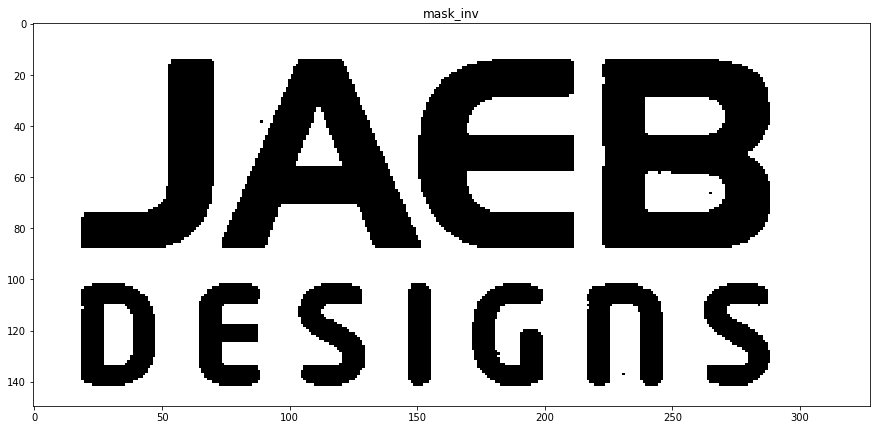

In [299]:
# background 추출위한 마스크 --> 255인 영역이 배경으로 합성
mask_inv = cv2.bitwise_not(mask)
imshow('mask_inv', mask_inv)

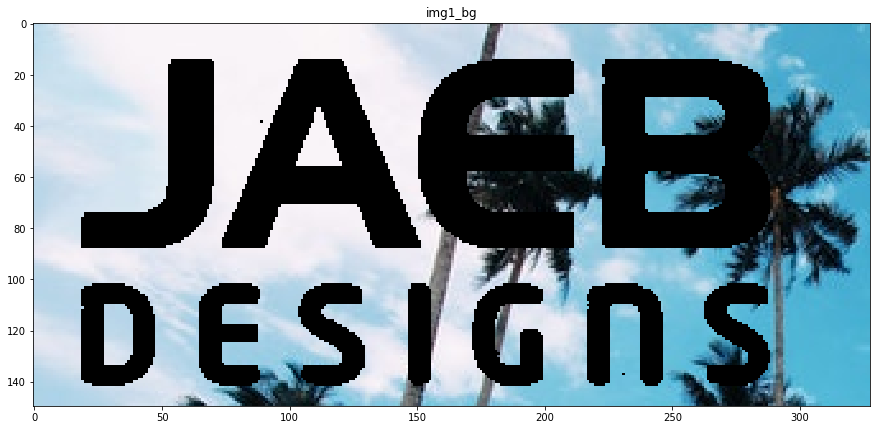

In [300]:
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
imshow('img1_bg', img1_bg)

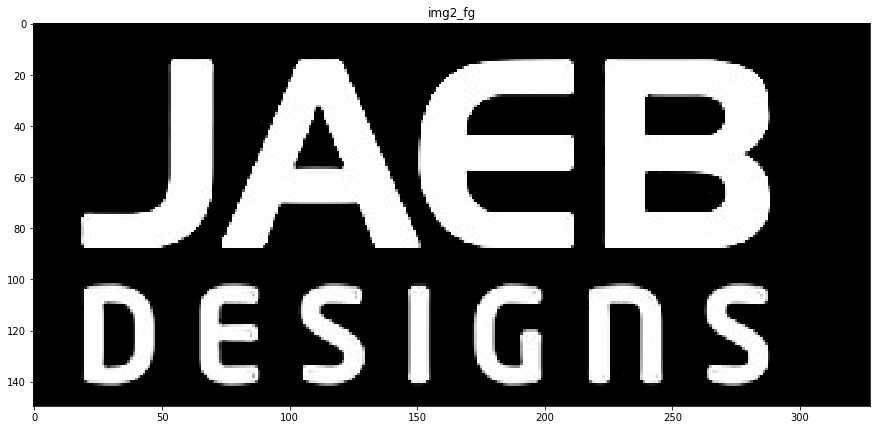

In [303]:
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
imshow('img2_fg', img2_fg)

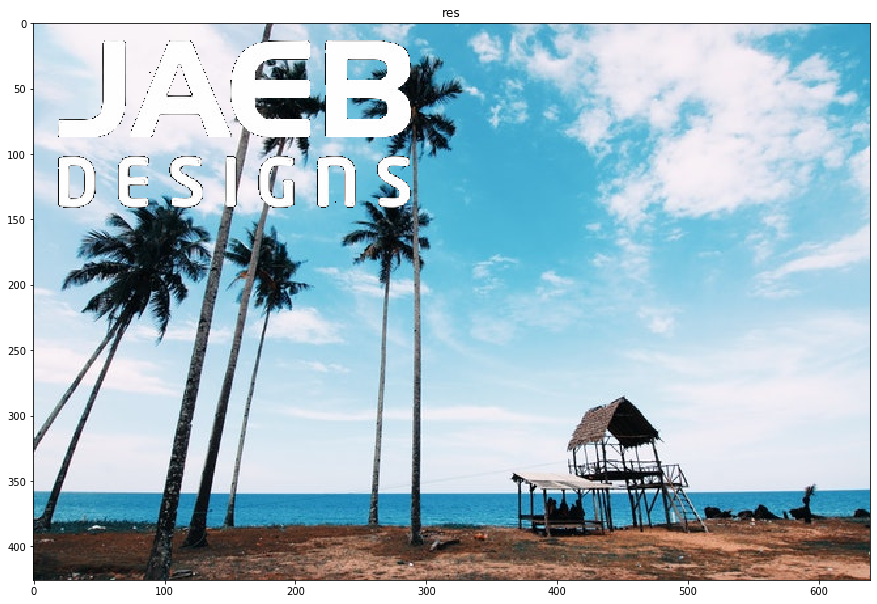

In [304]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
imshow('res',img1)

# Histogram

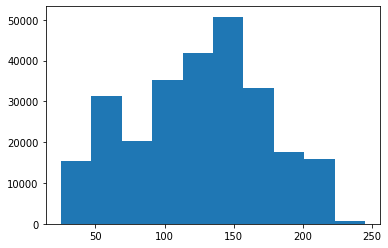

In [313]:
img = cv2.imread('./img/lenna.bmp', 0)

# img를 1개의 채널로 flatten()
plt.hist(img.flatten())
plt.show()

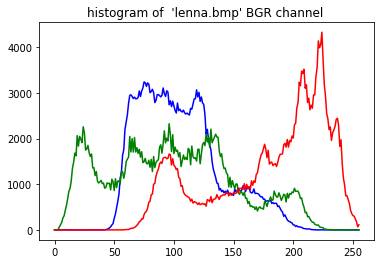

In [329]:
img = cv2.imread("./img/lenna.bmp")
# cv2.calcHist(list, channel, mask, max_range, range)
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256]) # mask = None => 전체이미지
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])
plt.title('histogram of  \'lenna.bmp\' BGR channel ')
plt.plot(hist_b, 'b')
plt.plot(hist_g, 'g')
plt.plot(hist_r, 'r')


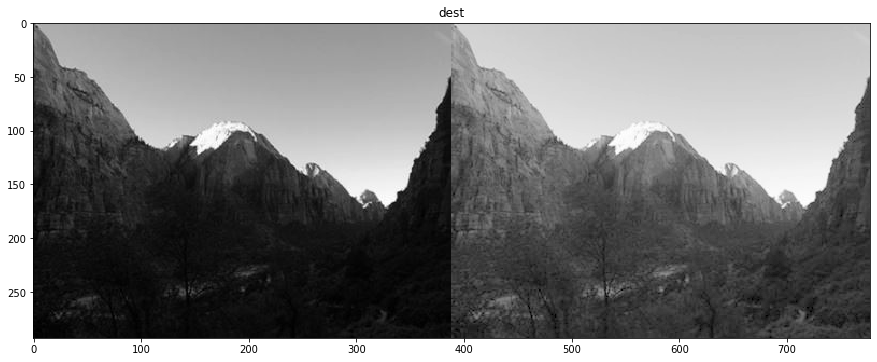

In [359]:
img1 = cv2.imread("./img/gamma3.jpg", 0)
gamma = 0.5
gamma_table = np.array([((i / 255.0) ** gamma) * 255.0 for i in np.arange(0, 256)]).astype('uint8')

out = cv2.LUT(img1, gamma_table)
imshow('dest', np.hstack((img1, out)))

(array([  284., 12372., 32545., 13563.,  7278.,  3991.,  2127., 11371.,
        25291.,  5155.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

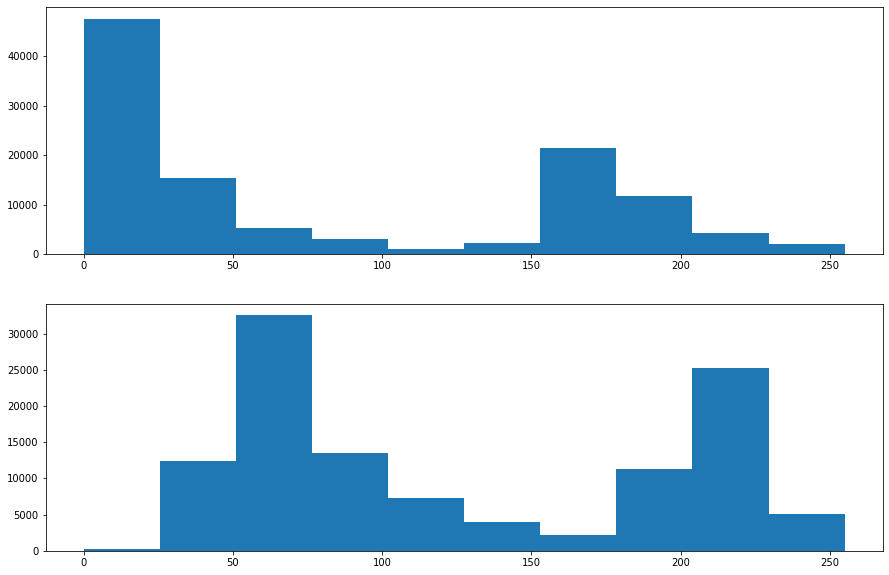

In [360]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.hist(img1.flatten())
plt.subplot(212)
plt.hist(out.flatten())

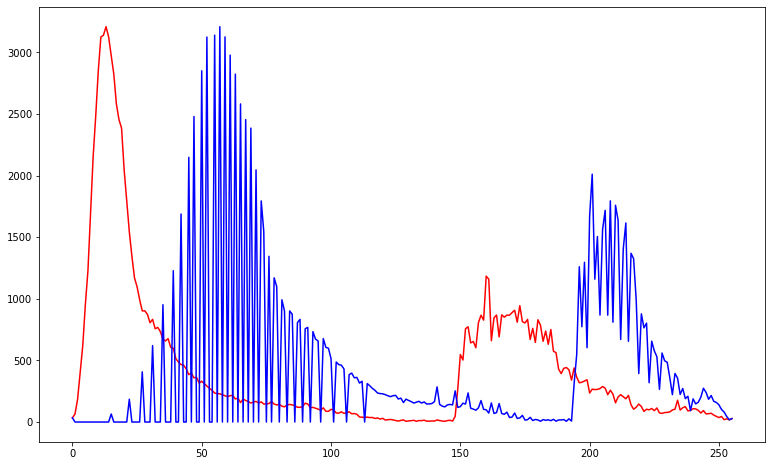

In [361]:
hist_1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist_2 = cv2.calcHist([out], [0], None, [256], [0, 256])
plt.figure(figsize=(13, 8))
plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

# Histogram Stretching

In [379]:
src = cv2.imread("./img/lenna.bmp", 0)
gmin = float(np.min(src))
gmax = float(np.max(src))
print(gmin, gmax)

25.0 245.0


In [380]:
stretch =  ((src - gmin) * 255. / (gmax - gmin) ).astype(np.uint8)
sgmin = float(np.min(stretch))
sgmax = float(np.max(stretch))
print(sgmin, sgmax)

0.0 255.0


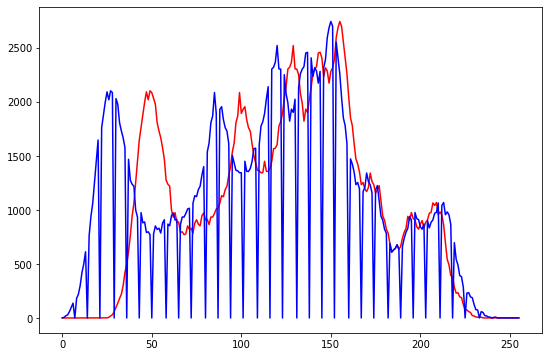

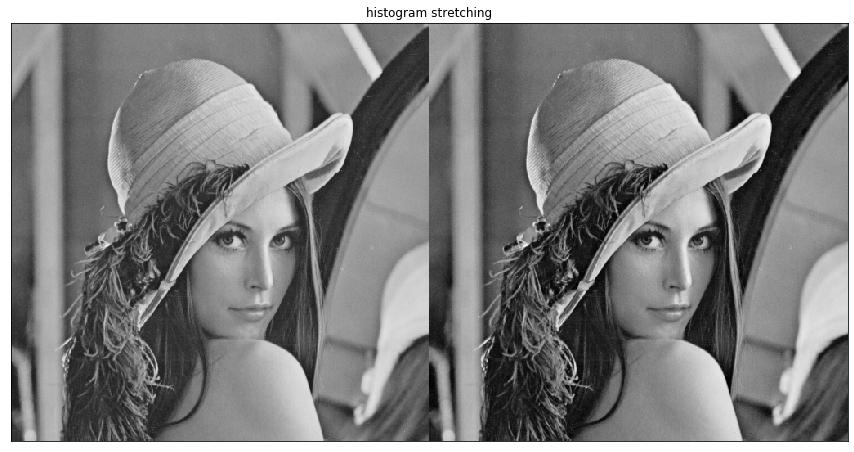

In [393]:
hist_src = cv2.calcHist([src], [0], None, [256], [0,256])
hist_stretch = cv2.calcHist([stretch], [0], None, [256], [0,256])
plt.figure(figsize=(9, 6))
plt.plot(hist_src, 'r')
plt.plot(hist_stretch, 'b')
imshow('histogram stretching', np.hstack((src, stretch)))


# 히스토그램 평활화
- 화소값의 분포를 나타내는 히스토그램이 균일하게 되도록 변환하는 처리

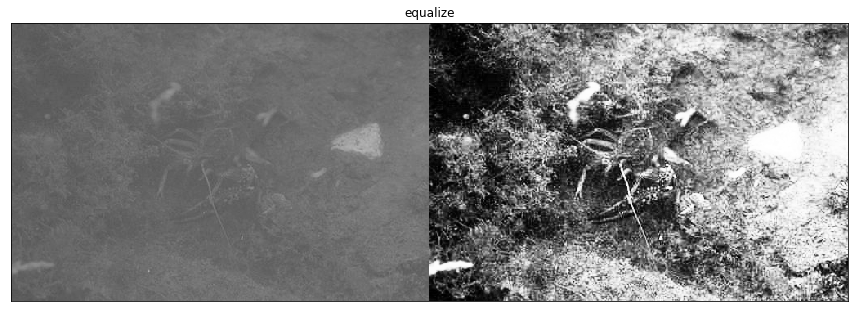

In [402]:
src = cv2.imread('./img/crayfish.jpg', 0)
hst = cv2.equalizeHist(src)
imshow('equalize', np.hstack((src,hst)))

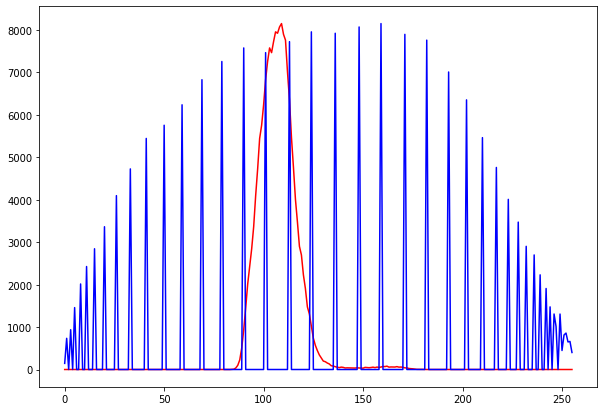

In [406]:
hist_src = cv2.calcHist([src], [0], None, [256], [0,256])
hist_hst = cv2.calcHist([hst], [0], None, [256], [0,256])
plt.figure(figsize=(10, 7))
plt.plot(hist_src, 'r')
plt.plot(hist_hst, 'b')

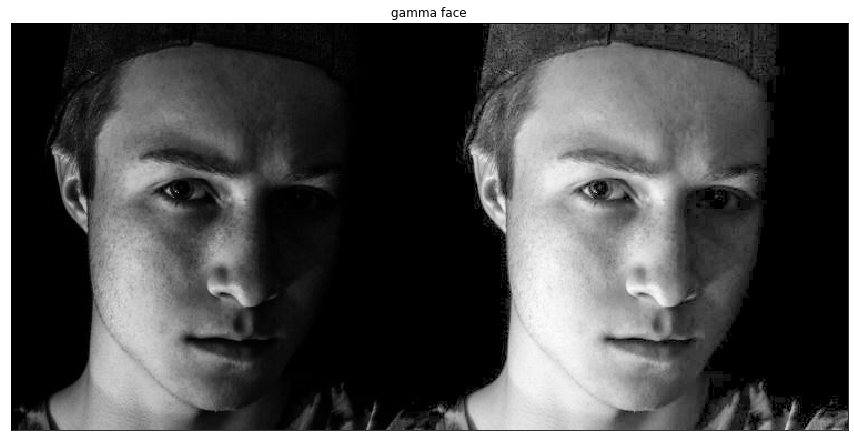

In [408]:
face = cv2.imread('./img/face.jpg', 0)
gamma = 0.5
gamma_table = np.array([((i / 255.0) ** gamma) * 255.0 for i in np.arange(0, 256)]).astype('uint8')
out = cv2.LUT(face, gamma_table)
imshow('gamma face', np.hstack((face, out)))

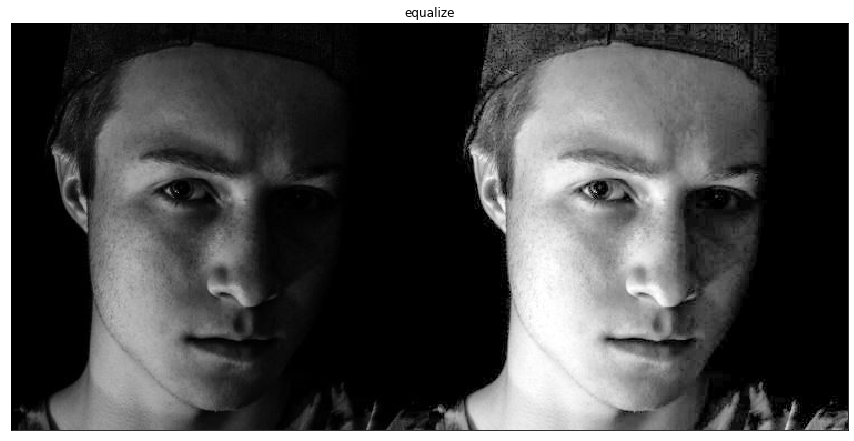

In [411]:
dst = cv2.equalizeHist(face)
imshow('equalize', np.hstack((face, dst)))

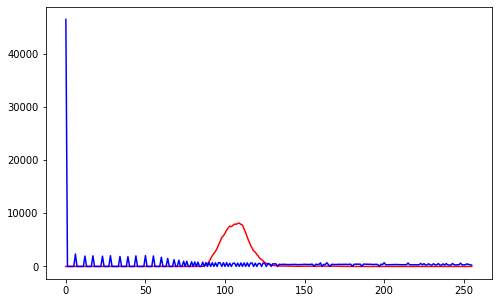

In [414]:
hist_src = cv2.calcHist([src], [0], None, [256], [0,256])
hist_equ = cv2.calcHist([dst], [0], None, [256], [0,256])
plt.figure(figsize=(8, 5))
plt.plot(hist_src, 'r')
plt.plot(hist_equ, 'b')

# 히스토그램을 이용한 전경과 배경 분리
- threshold 값을 특정하기가 힘듦
- k-means를 이용하여 어떤 픽셀값이 전경 또는 배경에 속하는 값인지 구분하여 threshold를 학습하도록 한다 

In [457]:
src = cv2.imread('./img/cells.jpg', 0)
box = cv2.imread('./img/box.png')

In [458]:
# sample이 1치원의라도 (x, 1)로 reshape 해주어야 한다.
# adaptive threshold
from sklearn.cluster import KMeans
X = src.flatten().reshape(-1,1)
print(X.shape)

(50325, 1)


In [459]:
model = KMeans(n_clusters=2, init="random", max_iter=20).fit(X)
p = model.cluster_centers_
print("c1: ", p[0,0], '\nc2: ', p[1,0])

c1:  145.02825692237764 
c2:  225.87774913882149


In [460]:
th = (p[1,0] + p[0,0]) / 2.0
print(th)

185.45300303059958


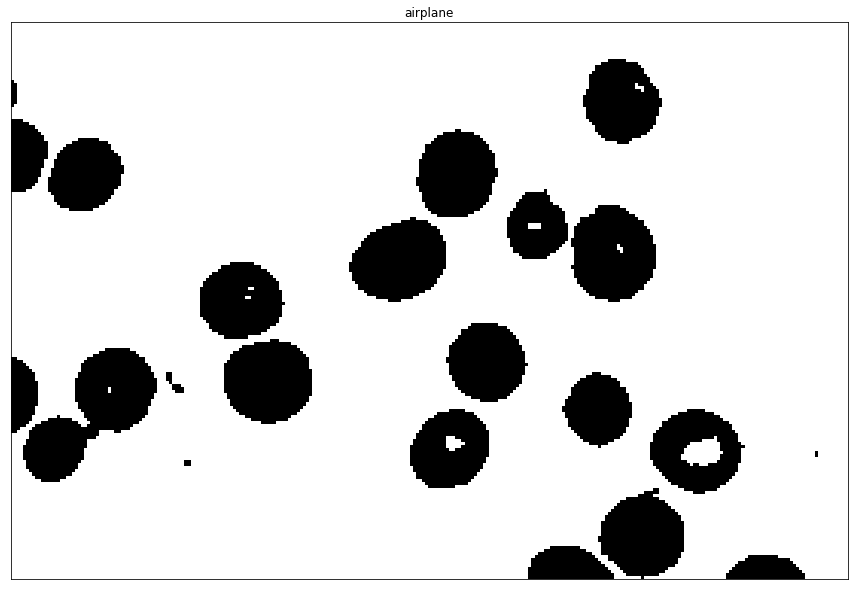

In [462]:
src = (src > th) * 255
imshow('airplane', src)